#Mounting Drive

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd /content/gdrive/My\ Drive/Assignment/

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive
/content/gdrive/My Drive/Assignment


#Capturing necessary installation

In [2]:
!pip install albumentations
!pip install torchsummary
!pip install torch-lr-finder
!pip install torch-lr-finder -v --global-option="amp"

     |████████████████████████████████| 634kB 8.8MB/s 
  Created wheel for imgaug: filename=imgaug-0.2.6-cp36-none-any.whl size=654020 sha256=86442ae2f7726336dc40bded5ebde7e86baf0b767d8256c443961bab2649eb93
  Stored in directory: /root/.cache/pip/wheels/97/ec/48/0d25896c417b715af6236dbcef8f0bed136a1a5e52972fc6d0
Successfully built imgaug
  Found existing installation: imgaug 0.2.9
    Uninstalling imgaug-0.2.9:
      Successfully uninstalled imgaug-0.2.9
/usr/local/lib/python3.6/dist-packages/pip/_internal/commands/install.py:283: UserWarning: Disabling all use of wheels due to the use of --build-options / --global-options / --install-options.
  cmdoptions.check_install_build_global(options)
Created temporary directory: /tmp/pip-ephem-wheel-cache-vrkfm_rb
Created temporary directory: /tmp/pip-req-tracker-k20pf2v_
Created requirements tracker '/tmp/pip-req-tracker-k20pf2v_'
Created temporary directory: /tmp/pip-install-gn63ljal
Cleaning up...
Removed build tracker '/tmp/pip-req-tracker-

#Applying transformations
For training we used horizontal flip, normalization and cutout



In [3]:
from Transform_utils.transforme_album import Data

data = Data()
trainset = data.getTrainDataSet(train=True)
testset =  data.getTrainDataSet(train=False)
trainloader = data.getDataLoader(trainset, 128)
trainloader1 = data.getDataLoader(trainset, 4)
testloader = data.getDataLoader(testset, 128)
testloader1 = data.getDataLoader(testset, 4)
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


#Images display post augmentation



  pip install torch-lr-finder -v --global-option="amp"


      plane        dog       deer       deer


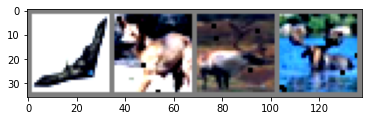

In [4]:
import torchvision
import general_utils

# get some random training images
dataiter = iter(trainloader1)
images, labels = dataiter.next()

# show images
general_utils.imshow(torchvision.utils.make_grid(images))
print('     ','      '.join('%5s' % classes[labels[j]] for j in range(4)))

#Importing torch Summary

In [5]:
from Model_ import resnet
from torchsummary import summary
import cudas
import torch

device = torch.device("cuda" if cudas.cuda else "cpu")
net = resnet.ResNet18().to(device)
summary(net, input_size=(3, 32, 32))

CUDA Available? True
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-

#Define a Loss function, optimizer
#Get LR finder results
Let's use a Classification Cross-Entropy loss and SGD with momentum.

Stopping early, the loss has diverged
Learning rate search finished. See the graph with {finder_name}.plot()


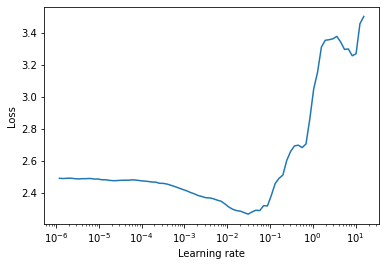

In [6]:
import torch.optim as optim
import torch.nn as nn
import general_utils as gu

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=1e-7, momentum=0.9, weight_decay=0.0001)
gu.lrfinder(net, optimizer, criterion, trainloader)

In [0]:
optimizer = optim.SGD(net.parameters(), lr=1e-1, momentum=0.9, weight_decay=0.0001)

#scheduler = torch.optim.lr_scheduler.CyclicLR(optimizer, base_lr=0.001, max_lr=0.1)
#scheduler = StepLR(optimizer, step_size=10, gamma=0.5)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=5, verbose=False, threshold=0.0001, threshold_mode='rel', cooldown=0, min_lr=0, eps=1e-08)

4. Train the network
^^^^^^^^^^^^^^^^^^^^

This is when things start to get interesting.
We simply have to loop over our data iterator, and feed the inputs to the
network and optimize.



In [8]:
import torch
from tqdm import tqdm
from Train_Test_utils.traine import train
from Train_Test_utils.teste import test
test_acc = []
train_acc = []
trainloss_ = []
testloss_ = []
loss=1000
loss = 1000
for epoch in range(50):  # loop over the dataset multiple times
    for param_group in optimizer.param_groups:
      print("lr= ",param_group['lr'])
    trainacc, loss = train(net, device, trainloader, optimizer, criterion, epoch)
    train_acc.append(trainacc)
    testacc, loss1 = test(net, device, testloader, criterion)
    test_acc.append(testacc)
    trainloss_.append(loss)
    testloss_.append(loss1)
    scheduler.step(loss1)
print('Finished Training')

  0%|          | 0/391 [00:00<?, ?it/s]

lr=  0.1


Epoch= 0 Loss=1.4874534606933594 Batch_id=390 Accuracy=56.25: 100%|██████████| 391/391 [01:18<00:00,  4.96it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test Loss= 1.8772447 Test Accuracy= 44.36
lr=  0.1


Epoch= 1 Loss=1.2928975820541382 Batch_id=390 Accuracy=60.00: 100%|██████████| 391/391 [01:19<00:00,  4.93it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test Loss= 1.1489102 Test Accuracy= 57.68
lr=  0.1


Epoch= 2 Loss=0.9897453188896179 Batch_id=390 Accuracy=70.00: 100%|██████████| 391/391 [01:19<00:00,  4.94it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test Loss= 0.98709965 Test Accuracy= 65.82
lr=  0.1


Epoch= 3 Loss=0.8002740740776062 Batch_id=390 Accuracy=75.00: 100%|██████████| 391/391 [01:19<00:00,  4.92it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test Loss= 0.78083587 Test Accuracy= 71.15
lr=  0.1


Epoch= 4 Loss=0.501512348651886 Batch_id=390 Accuracy=87.50: 100%|██████████| 391/391 [01:19<00:00,  4.92it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test Loss= 1.2617227 Test Accuracy= 75.84
lr=  0.1


Epoch= 5 Loss=0.5094046592712402 Batch_id=390 Accuracy=90.00: 100%|██████████| 391/391 [01:19<00:00,  4.93it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test Loss= 0.68791264 Test Accuracy= 72.88
lr=  0.1


Epoch= 6 Loss=0.5682700872421265 Batch_id=390 Accuracy=85.00: 100%|██████████| 391/391 [01:19<00:00,  4.92it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test Loss= 0.19900835 Test Accuracy= 78.6
lr=  0.1


Epoch= 7 Loss=0.5631364583969116 Batch_id=390 Accuracy=88.75: 100%|██████████| 391/391 [01:19<00:00,  4.94it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test Loss= 0.3702936 Test Accuracy= 81.19
lr=  0.1


Epoch= 8 Loss=0.41055813431739807 Batch_id=390 Accuracy=91.25: 100%|██████████| 391/391 [01:19<00:00,  4.93it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test Loss= 0.3678307 Test Accuracy= 81.41
lr=  0.1


Epoch= 9 Loss=0.43809184432029724 Batch_id=390 Accuracy=91.25: 100%|██████████| 391/391 [01:19<00:00,  4.92it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test Loss= 0.5344068 Test Accuracy= 80.92
lr=  0.1


Epoch= 10 Loss=0.2795913517475128 Batch_id=390 Accuracy=95.00: 100%|██████████| 391/391 [01:19<00:00,  4.92it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test Loss= 0.4170911 Test Accuracy= 84.22
lr=  0.1


Epoch= 11 Loss=0.3622470498085022 Batch_id=390 Accuracy=92.50: 100%|██████████| 391/391 [01:19<00:00,  4.91it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test Loss= 0.033595145 Test Accuracy= 82.43
lr=  0.1


Epoch= 12 Loss=0.1969069093465805 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [01:19<00:00,  4.93it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test Loss= 0.59576637 Test Accuracy= 82.72
lr=  0.1


Epoch= 13 Loss=0.23115429282188416 Batch_id=390 Accuracy=98.75: 100%|██████████| 391/391 [01:19<00:00,  4.94it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test Loss= 1.102405 Test Accuracy= 84.01
lr=  0.1


Epoch= 14 Loss=0.15004146099090576 Batch_id=390 Accuracy=98.75: 100%|██████████| 391/391 [01:19<00:00,  4.92it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test Loss= 0.72915107 Test Accuracy= 84.95
lr=  0.1


Epoch= 15 Loss=0.192009836435318 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [01:19<00:00,  4.93it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test Loss= 0.6749685 Test Accuracy= 84.04
lr=  0.1


Epoch= 16 Loss=0.12987104058265686 Batch_id=390 Accuracy=98.75: 100%|██████████| 391/391 [01:19<00:00,  4.93it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test Loss= 0.28392375 Test Accuracy= 83.68
lr=  0.1


Epoch= 17 Loss=0.16115637123584747 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [01:19<00:00,  4.93it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test Loss= 0.48254135 Test Accuracy= 84.53
lr=  0.05


Epoch= 18 Loss=0.019432753324508667 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [01:19<00:00,  4.94it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test Loss= 0.0153211355 Test Accuracy= 87.85
lr=  0.05


Epoch= 19 Loss=0.0578998401761055 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [01:19<00:00,  4.92it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test Loss= 0.04751718 Test Accuracy= 87.25
lr=  0.05


Epoch= 20 Loss=0.01848651096224785 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [01:19<00:00,  4.94it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test Loss= 0.3652589 Test Accuracy= 87.4
lr=  0.05


Epoch= 21 Loss=0.012800591997802258 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [01:19<00:00,  4.92it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test Loss= 0.8087082 Test Accuracy= 87.23
lr=  0.05


Epoch= 22 Loss=0.029625440016388893 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [01:19<00:00,  4.92it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test Loss= 0.1505633 Test Accuracy= 87.26
lr=  0.05


Epoch= 23 Loss=0.02060176059603691 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [01:19<00:00,  4.92it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test Loss= 0.45996457 Test Accuracy= 87.08
lr=  0.05


Epoch= 24 Loss=0.02305377647280693 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [01:19<00:00,  4.95it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test Loss= 0.7508078 Test Accuracy= 87.29
lr=  0.025


Epoch= 25 Loss=0.00605729827657342 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [01:19<00:00,  4.92it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test Loss= 0.9500414 Test Accuracy= 88.26
lr=  0.025


Epoch= 26 Loss=0.01379021443426609 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [01:19<00:00,  4.93it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test Loss= 0.09865078 Test Accuracy= 88.64
lr=  0.025


Epoch= 27 Loss=0.0034430385567247868 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [01:19<00:00,  4.92it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test Loss= 1.0770282 Test Accuracy= 88.46
lr=  0.025


Epoch= 28 Loss=0.0035094618797302246 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [01:19<00:00,  4.95it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test Loss= 0.35569537 Test Accuracy= 88.44
lr=  0.025


Epoch= 29 Loss=0.0011994242668151855 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [01:19<00:00,  4.94it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test Loss= 0.060629755 Test Accuracy= 88.83
lr=  0.025


Epoch= 30 Loss=0.0018711090087890625 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [01:19<00:00,  4.93it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test Loss= 0.06573956 Test Accuracy= 88.88
lr=  0.0125


Epoch= 31 Loss=0.0005120396381244063 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [01:19<00:00,  4.95it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test Loss= 0.52262646 Test Accuracy= 88.76
lr=  0.0125


Epoch= 32 Loss=0.0018303096294403076 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [01:19<00:00,  4.95it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test Loss= 0.004097998 Test Accuracy= 88.79
lr=  0.0125


Epoch= 33 Loss=0.0009398221736773849 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [01:19<00:00,  4.94it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test Loss= 0.896507 Test Accuracy= 88.94
lr=  0.0125


Epoch= 34 Loss=0.0018886446487158537 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [01:19<00:00,  4.92it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test Loss= 0.088354856 Test Accuracy= 88.7
lr=  0.0125


Epoch= 35 Loss=0.008824294432997704 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [01:19<00:00,  4.93it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test Loss= 0.40426517 Test Accuracy= 88.87
lr=  0.0125


Epoch= 36 Loss=0.000491285347379744 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [01:18<00:00,  4.95it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test Loss= 0.6882702 Test Accuracy= 88.69
lr=  0.0125


Epoch= 37 Loss=0.004218286368995905 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [01:19<00:00,  4.93it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test Loss= 1.6000265 Test Accuracy= 88.92
lr=  0.0125


Epoch= 38 Loss=0.0064924596808850765 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [01:19<00:00,  4.95it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test Loss= 0.8220701 Test Accuracy= 88.88
lr=  0.00625


Epoch= 39 Loss=0.0011158942943438888 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [01:19<00:00,  4.94it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test Loss= 0.8234501 Test Accuracy= 89.03
lr=  0.00625


Epoch= 40 Loss=0.0017527162563055754 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [01:19<00:00,  4.93it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test Loss= 0.923749 Test Accuracy= 88.96
lr=  0.00625


Epoch= 41 Loss=0.0007617354276590049 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [01:19<00:00,  4.94it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test Loss= 0.018107116 Test Accuracy= 88.76
lr=  0.00625


Epoch= 42 Loss=0.0005970716592855752 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [01:18<00:00,  4.96it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test Loss= 0.61460644 Test Accuracy= 88.92
lr=  0.00625


Epoch= 43 Loss=0.0006073832628317177 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [01:19<00:00,  4.95it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test Loss= 0.0066818 Test Accuracy= 89.14
lr=  0.00625


Epoch= 44 Loss=0.0006331444019451737 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [01:19<00:00,  4.93it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test Loss= 1.6332068 Test Accuracy= 89.15
lr=  0.003125


Epoch= 45 Loss=0.0006379008409567177 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [01:19<00:00,  4.92it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test Loss= 0.8737396 Test Accuracy= 88.86
lr=  0.003125


Epoch= 46 Loss=0.001155209494754672 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [01:19<00:00,  4.93it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test Loss= 0.29518297 Test Accuracy= 89.26
lr=  0.003125


Epoch= 47 Loss=0.0027197361923754215 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [01:19<00:00,  4.93it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test Loss= 0.099359274 Test Accuracy= 89.15
lr=  0.003125


Epoch= 48 Loss=0.00046094655408523977 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [01:19<00:00,  4.95it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test Loss= 0.43836495 Test Accuracy= 89.19
lr=  0.003125


Epoch= 49 Loss=0.0004933953168801963 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [01:19<00:00,  4.93it/s]
100%|██████████| 79/79 [00:03<00:00, 20.88it/s]

Test Loss= 0.4187639 Test Accuracy= 89.11
Finished Training


#Plot Train/Test Accuracy and loss

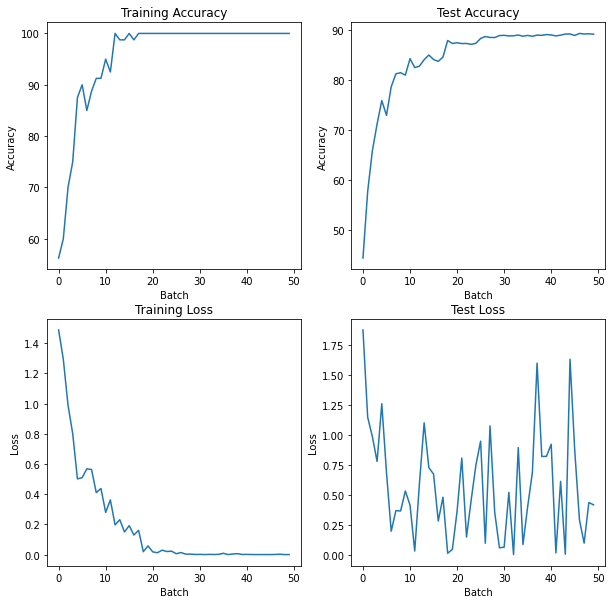

In [9]:
general_utils.plot_acc_loss(train_acc, test_acc, trainloss_, testloss_)

#Groundtruth vs Predictions

GT     frog       frog        dog      plane
Pred   frog       frog        dog      plane


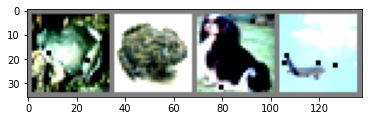

In [10]:
dataiter = iter(testloader1)
images, labels = dataiter.next()

# print images
general_utils.imshow(torchvision.utils.make_grid(images))
print('GT   ', '      '.join('%5s' % classes[labels[j]] for j in range(4)))

outputs = net(images.cuda())
_, predicted = torch.max(outputs, 1)
print('Pred ', '      '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

The results seem pretty good.

Let us look at how the network performs on the whole dataset.



#Categorywise predictions



In [11]:
from Train_Test_utils.teste import test_categorywise
test_categorywise(net, device, testloader, classes)

100%|██████████| 79/79 [00:03<00:00, 20.74it/s]

Accuracy of plane : 94.59 %
Accuracy of   car : 100.00 %
Accuracy of  bird : 73.53 %
Accuracy of   cat : 82.86 %
Accuracy of  deer : 85.71 %
Accuracy of   dog : 89.66 %
Accuracy of  frog : 85.19 %
Accuracy of horse : 97.14 %
Accuracy of  ship : 88.57 %
Accuracy of truck : 96.15 %


#Getting new testloader for gradcam
every time one image comes out

In [12]:
# get the image from the dataloader
testset =  data.getTrainDataSet(train=False)
testloader2 = data.getGradCamDataLoader(testset)
it = iter(testloader2)

Files already downloaded and verified


#Finding misclassified images

/content/gdrive/My Drive/Assignment/gradcame.py:102: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrows=1, ncols=3)


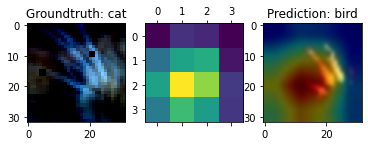

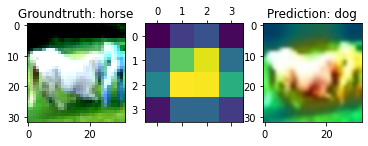

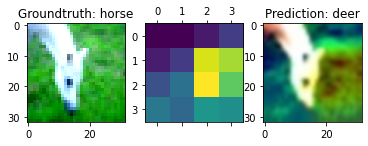

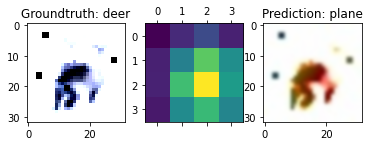

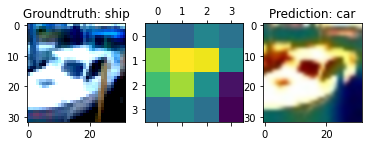

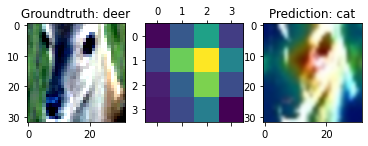

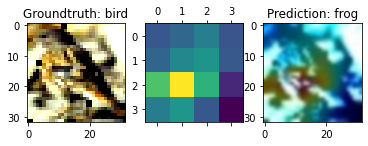

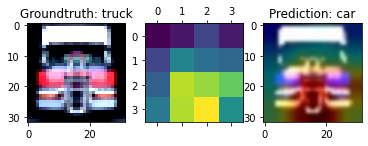

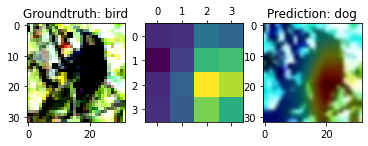

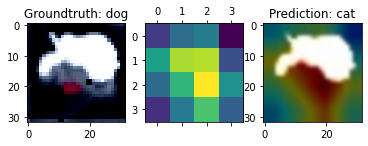

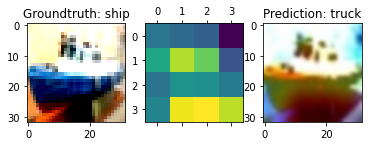

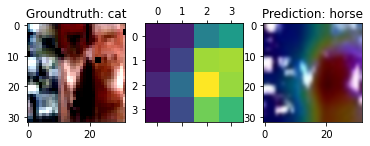

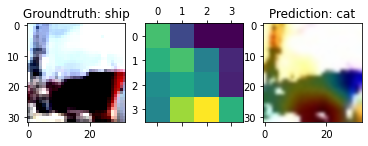

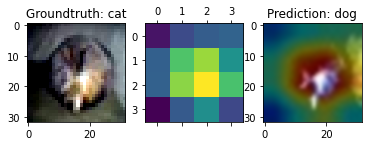

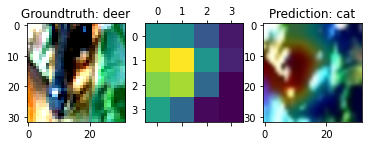

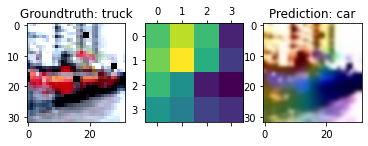

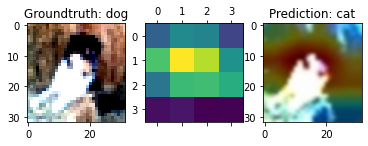

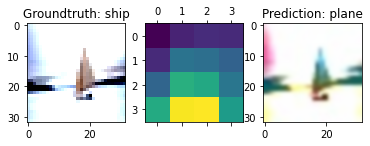

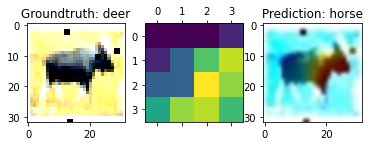

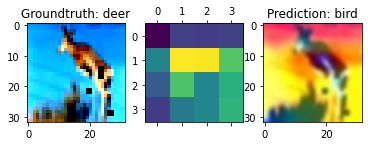

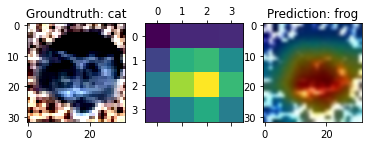

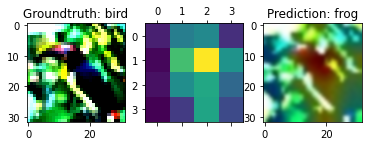

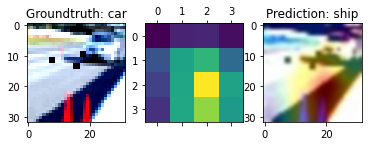

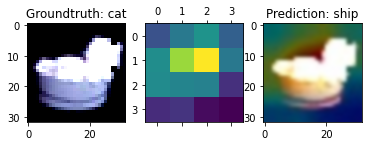

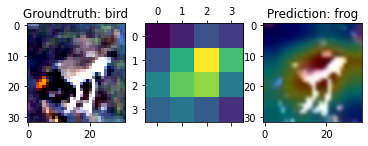

In [13]:
import gradcame
count = 0
while(count != 25):
    images, labels = it.next()
    output = net(images.cuda())
    pred = output.argmax(dim=1, keepdim=True)
    if(classes[pred] != classes[labels]):
      gradcame.gradcamof(net, images, classes, str(classes[labels]), str(classes[pred]))
      count=count+1

#Classified images Gradcam

/content/gdrive/My Drive/Assignment/gradcame.py:102: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrows=1, ncols=3)


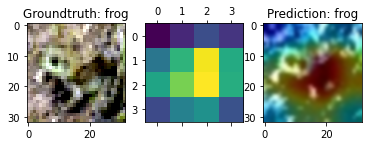

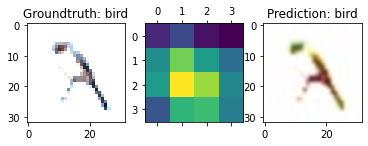

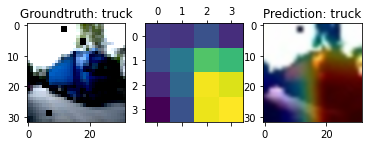

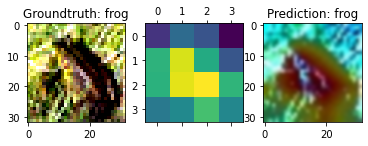

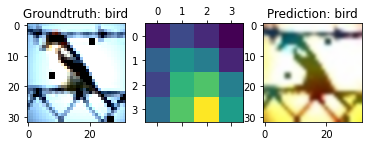

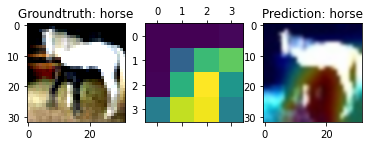

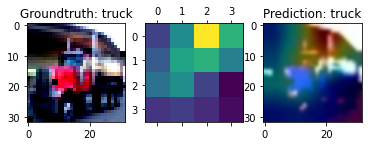

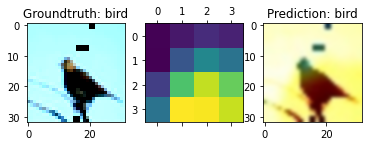

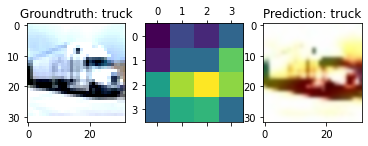

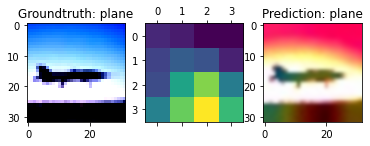

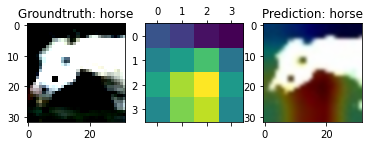

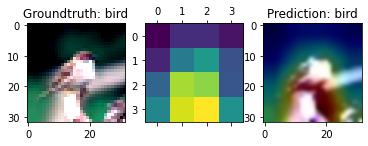

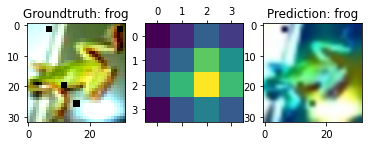

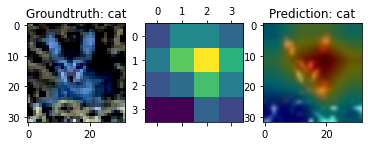

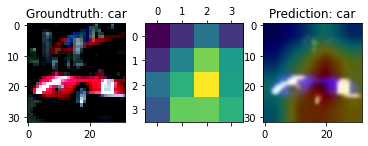

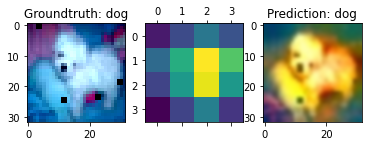

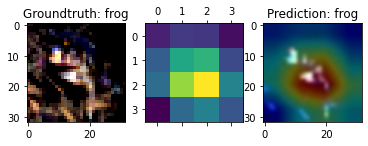

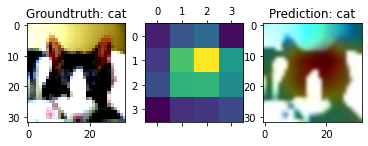

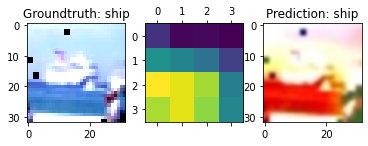

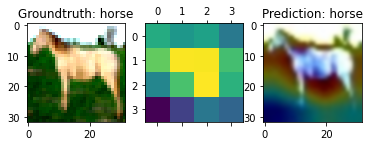

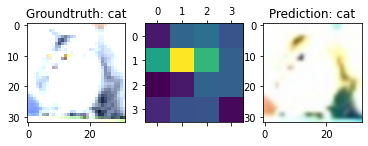

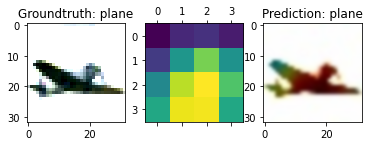

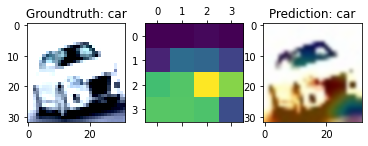

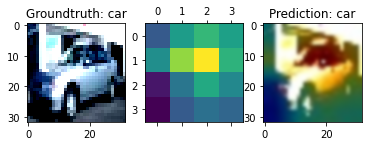

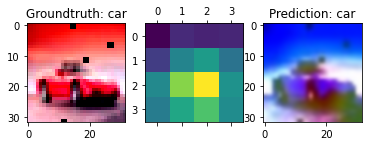

In [14]:
import gradcame
count = 0
while(count != 25):
    images, labels = it.next()
    output = net(images.cuda())
    pred = output.argmax(dim=1, keepdim=True)
    if(classes[pred] == classes[labels]):
      gradcame.gradcamof(net, images, classes, str(classes[labels]), str(classes[pred]))
      count=count+1